## ABOUBAKAR Ouattara

## TP1.2 Simulation du mouvement Brownien

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 1

## QUESTION 1

## Question (a)

On a :


$W_t \text{ est un mouvement brownien.}$

alors pour $t>s$, On a:
$$
W_{t} - W_s \sim \mathcal{N}(0, t - s)
$$

Pour $ t^{n}_{i+1} = (i+1)\frac{T}{n} > t^{n}_{i} = i\frac{T}{n} $ On a: 

$$
W_{t^{n}_{i+1}} - W_{^{n}_{t_i}} \sim \mathcal{N}(0, \Delta t)
$$

En notant  $ Z_i \sim \mathcal{N}(0, 1)$   pour  $i = (1, \dots, n )$, on a :

$$
W_{t^{n}_{i+1}} - W_{^{n}_{t_i}} = \sqrt{\Delta t} \, Z_i
$$

On a donc le resultat voulu

## Question (b)


In [3]:
def simul(n, T, m):

    delta = T/n # delta de temps

    t = np.linspace(0, T, n+1) # discretisation des points

    # simulation de m trajectoire 
    Z = np.random.normal(0, 1, (m, n)) # simulation de normal centré reduit en tant que matrice (m; n)
    dW = np.sqrt(delta) * Z  # stock la difference entre W_{t_{i+1}} - W_{t_i}

    W = np.zeros((m, n +1)) # matrice pour stimuilé les trajectoires

    # remplissage de la matrice
    W[:, 1:] = np.cumsum(dW, axis=1)
    return W, t

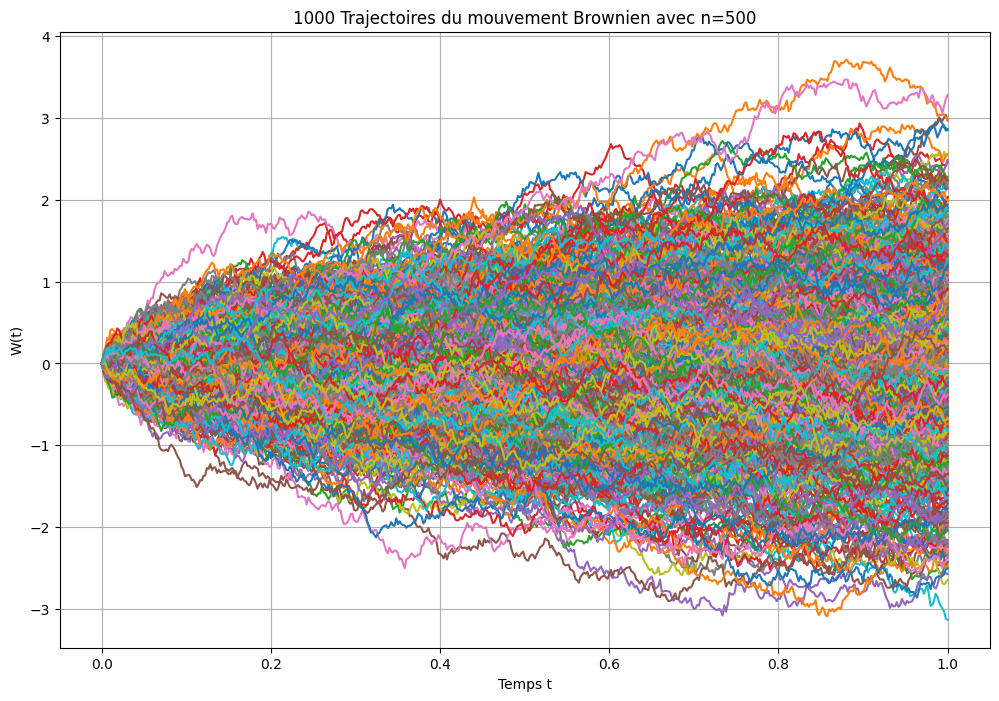

In [4]:

n = 500
m=1000
W, t = simul(n, T, m)
# Affichage des trajectoires


plt.figure(figsize=(12,8))
for i in range(m):  # Affichage des m trajectoires
    plt.plot(t, W[i, :])
plt.title(f'{m} Trajectoires du mouvement Brownien avec n={n}')
plt.xlabel('Temps t')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

## Question (c)

Dans cette question, on nous demande la moyenne empirique, la variance empirique, ainsi que la covariance empirique de $W_{T}$ c'est a dire des $W$ lorsque $i=n$
pour different valeus de $n = {100, 1000, 10000}$. Aussi il faut fournir l'intervalle de confiance empirique

## La moyenne empirique de $W_T$

il suffit de prendre la valeur $W$ pour $i = n $ dans chaque trajectoire et de fait une somme diviser par le nombre de trajectoire

On a donc la moyenne empirique noté $\mu$:

$$
\mu = \frac{1}{m} \sum_{i=1}^{m} W_T^{(i)}
$$

## la variancve empirique $W_T$

et la variancve empirique est donné par $\sigma$ avec:

$$
\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} \left( W_T^{(i)} - \mu \right)^2
$$

## Intervalle de Confiance

Grâce au theoreme centrale limite, on sait que:

$$
\sqrt m\frac{W_T - \mu}{\sigma} \sim \mathcal{N}(0, 1)
$$
Alors on endeduit l'intervalle de confiance suivant:

$$
IC = \left[ \mu - 1.96 \times \frac{\sigma}{\sqrt{m}}, \, \mu + 1.96 \times \frac{\sigma}{\sqrt{m}} \right]
$$

## Covariance empirique

La covariance emprique est donné par la formule:
$$
\text{Cov}(W_{T/2}, W_T) = \frac{1}{m} \sum_{i=1}^{m} \left( W_{T/2}^{(i)} - \overline{W}_{T/2} \right) \left( W_T^{(i)} - \overline{W}_T \right)
$$
avec:\
$\overline{W}_{T/2} :$ est la moyenne empirique de $ W_{T/2}$

$\overline{W}_T : $: est la myenne empirique de $W_T$


In [5]:
# Je vais creer une fonction qui retourne la moyenne , variance, intervalle de confiance, et covariance empirique

def W_T_MVICC(n, T, m):
    W, t = simul(n, T, m)

    # moyenne empirique
    M_WT = np.mean(W[:, -1]) # derniere colonne de W correspond à W_T

    # Variance empirique de W_T
    var_WT = np.var(W[:, -1])

    # Intervalle de confiance à 95% pour la moyenne de W_T
    std_WT = np.sqrt(var_WT)  # Écart-type empirique
    IC = [M_WT - 1.96 * std_WT / np.sqrt(m), M_WT + 1.96 * std_WT / np.sqrt(m)]

    # Covariance empirique entre W_{T/2} et W_T
    cov_WT = np.cov(W[:, n//2], W[:, -1])[0, 1]

    return M_WT, var_WT, IC, cov_WT


In [6]:
N = [100, 1000, 10000]
for i in N:
    M, V, IC, C = W_T_MVICC(i, T, m, )
    print(f"Moyenne empirique de W_T pour n = {i}: {M}")
    print(f"Variance empirique de W_T pour n = {i}: {V}")
    print(f"Intervalle de confiance empirique pour la moyenne de W_T pour n = {i}: {IC}")
    print(f"Covariance empirique de (W_T/2, W_T) pour n = {i}: {C}")
    print("=================================================================================================")

Moyenne empirique de W_T pour n = 100: 0.02901156475297555
Variance empirique de W_T pour n = 100: 1.0527784889568959
Intervalle de confiance empirique pour la moyenne de W_T pour n = 100: [-0.03458366968465201, 0.0926067991906031]
Covariance empirique de (W_T/2, W_T) pour n = 100: 0.5401695321563604
Moyenne empirique de W_T pour n = 1000: 0.02920232318270996
Variance empirique de W_T pour n = 1000: 0.9822500662430145
Intervalle de confiance empirique pour la moyenne de W_T pour n = 1000: [-0.03222577994996999, 0.09063042631538991]
Covariance empirique de (W_T/2, W_T) pour n = 1000: 0.5072264885491669
Moyenne empirique de W_T pour n = 10000: -0.0509547958485663
Variance empirique de W_T pour n = 10000: 0.9996752812316252
Intervalle de confiance empirique pour la moyenne de W_T pour n = 10000: [-0.11292537403192209, 0.01101578233478949]
Covariance empirique de (W_T/2, W_T) pour n = 10000: 0.49568119542726086


## QUESTION 2

## Question (a)


Pour repondre à cette question nous allons utiliser la fonction caracteristique\
On a:


$\begin{aligned}
    \mathbb{E}\left[ e^{iuW_{l}} \middle| W_{s} = x, W_{t} = y \right]
    &= e^{iu \frac{x+y}{2}} \mathbb{E}\left[ \exp\left(iu \left( W_{l} - \frac{W_{s} + W_{t}}{2} \right) \right) \middle| W_{s} = x, W_{t} = y \right] \\
    &= e^{iu \frac{x+y}{2}} \mathbb{E}\left[ e^{-iu(W_{l} - W_{s})/2} e^{-iu(W_{l} - W_{t})/2} \middle| W_{s} = x, W_{t} = y\right] \\
    &= e^{iu \frac{x+y}{2}} e^{-\frac{1}{2} u^2 (l - s)/4} e^{-\frac{1}{2} u^2 (t - l)/4} \ \text{(Par independance des increment)} \\
    &= \exp\left( iu \frac{x+y}{2} - \frac{1}{2} u^2 \frac{t - s}{4} \right)
\end{aligned}$

Alors, la variable $ W_l | W_{s} = x, W_{t} = y $ suit donc une $\mathcal{N}(\frac{x+y}{2}, \frac{t - s}{4})$

## Question (b)

In [7]:
def simulation_retrograde(T, k, m):
    
    n = 2 ** k
    # Pas de temps
    dt = T / n
    t = np.linspace(0, T, n+1)
    # Initialisation des trajectoires : pour k=0, on a (W_0 = 0, W_T ~ N(0, T))
    W = np.zeros((m, n + 1))  # Trajectoires stockées dans une matrice (m, n+1)
    W[:, -1] = np.sqrt(T) * np.random.randn(m)  # W_T ~ N(0, T)
    
    # Simulation rétrograde en affinant la discrétisation
    for j in range(k):
        # Nombre de points pour ce niveau de discrétisation
        step = 2 ** (k - j)
        for i in range(0, n, step):
            mid = (i + i + step) // 2
            W_mid = 0.5 * (W[:, i] + W[:, i + step]) + np.sqrt(step * dt / 4) * np.random.randn(m)
            W[:, mid] = W_mid

    return W, t


## Question(c)

In [8]:
def W_T_MVICC_2(k, T, m):
    W,t = simulation_retrograde(T, k, m)
    n = 2**k
    # moyenne empirique
    M_WT = np.mean(W[:, -1]) # derniere colonne de W correspond à W_T

    # Variance empirique de W_T
    var_WT = np.var(W[:, -1])

    # Intervalle de confiance à 95% pour la moyenne de W_T
    std_WT = np.sqrt(var_WT)  # Écart-type empirique
    IC = [M_WT - 1.96 * std_WT / np.sqrt(m), M_WT + 1.96 * std_WT / np.sqrt(m)]

    # Covariance empirique entre W_{T/2} et W_T
    cov_WT = np.cov(W[:, n//2], W[:, -1])[0, 1]

    return M_WT, var_WT, IC, cov_WT


In [9]:
k = [8, 10, 12]
for i in k:
    M, V, IC, C = W_T_MVICC_2(i, T, m)
    print(f"Moyenne empirique de W_T pour k = {i}: {M}")
    print(f"Variance empirique de W_T pour k = {i}: {V}")
    print(f"Intervalle de confiance empirique pour la moyenne de W_T pour k = {i}: {IC}")
    print(f"Covariance empirique de (W_T/2, W_T) pour k = {i}: {C}")
    print("=================================================================================================")

Moyenne empirique de W_T pour k = 8: 0.04483446040537398
Variance empirique de W_T pour k = 8: 0.954860152886805
Intervalle de confiance empirique pour la moyenne de W_T pour k = 8: [-0.015731130183094237, 0.1054000509938422]
Covariance empirique de (W_T/2, W_T) pour k = 8: 0.47448392450184085
Moyenne empirique de W_T pour k = 10: -0.02377639988986847
Variance empirique de W_T pour k = 10: 0.9855771476074537
Intervalle de confiance empirique pour la moyenne de W_T pour k = 10: [-0.08530844983336373, 0.037755650053626785]
Covariance empirique de (W_T/2, W_T) pour k = 10: 0.5303685385169093
Moyenne empirique de W_T pour k = 12: -0.0007877058583290269
Variance empirique de W_T pour k = 12: 1.011479197710834
Intervalle de confiance empirique pour la moyenne de W_T pour k = 12: [-0.06312307692424905, 0.061547665207591]
Covariance empirique de (W_T/2, W_T) pour k = 12: 0.4918028499124865


## QUESTION 3


La variation quadratique d'une trajectoire discrétisée $ W_{t_0}, W_{t_1}, \dots, W_{t_n} $ est définie par :

$$
QV^n(W)_T = \sum_{i=1}^{n} \left( W_{t_i} - W_{t_{i-1}} \right)^2
$$

C'est une somme des carrés des différences des valeurs successives du mouvement Brownien simulé.


In [10]:
def Var_Quadr(W):
    m, n_plus_1 = W.shape
    n = n_plus_1 - 1
    
    # Calcul de la variation quadratique pour chaque trajectoire
    QV = np.sum(np.diff(W, axis=1) ** 2, axis=1)
    return QV

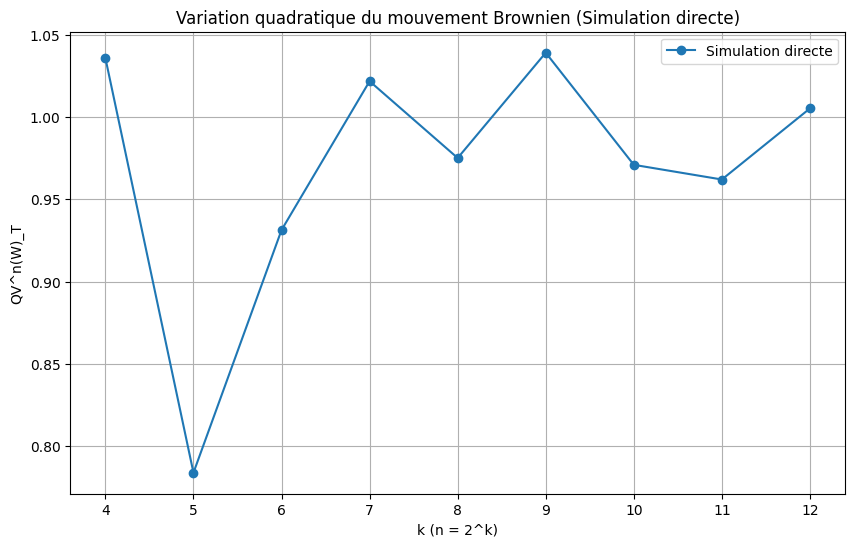

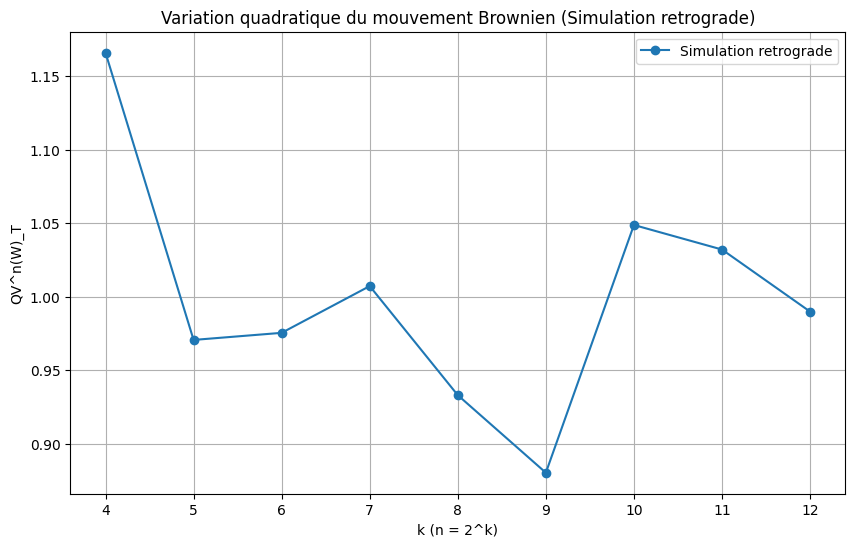

In [11]:
# Graphique pour la variation quadratique en simulation directe
k_values = list(range(4, 13))
QV_direct = []

for k in k_values:
    n = 2 ** k
    W_direct, _ = simul(n, T, m)
    QV = Var_Quadr(W_direct)
    QV_direct.append(QV[0])

plt.figure(figsize=(10, 6))
plt.plot(k_values, QV_direct, marker='o', label='Simulation directe')
plt.title("Variation quadratique du mouvement Brownien (Simulation directe)")
plt.xlabel('k (n = 2^k)')
plt.ylabel('QV^n(W)_T')
plt.grid(True)
plt.legend()
plt.show()


# Graphique pour la variation quadratique en simulation retrograde

QV_retrograde = []
for k in k_values:
    n = 2 ** k
    W_retro, _ = simulation_retrograde(T, k, m)
    QV = Var_Quadr(W_retro)
    QV_retrograde.append(QV[0])

plt.figure(figsize=(10, 6))
plt.plot(k_values, QV_retrograde, marker='o', label='Simulation retrograde')
plt.title("Variation quadratique du mouvement Brownien (Simulation retrograde)")
plt.xlabel('k (n = 2^k)')
plt.ylabel('QV^n(W)_T')
plt.grid(True)
plt.legend()
plt.show()




On remarque que la variation quadratique des deux simulations converge vers 1